In [5]:
from fdh_gallica import Periodical, Search, Document
from fdh_gallica.parallel_process import iiif_urls_for_documents

from tqdm.autonotebook import tqdm

import json
import pandas as pd
from pandas.io.json import json_normalize

/Users/lguillain/opt/anaconda3/envs/fdh/lib/python3.7/site-packages/tqdm/autonotebook.py:17: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  " (e.g. in jupyter console)", TqdmExperimentalWarning)


In [68]:
%matplotlib inline

get all images with relevant query

In [6]:
re_execute = False
if re_execute:
    obj = Search(all_fields='atelier Nadar', dc_type='image', dc_creator='Atelier Nadar')
    obj.execute()
    print(f'number of fetched documents: {len(obj.documents)}')
    print(f'total records {obj.total_records}')
    print('retry fetching ...')
    obj.retry()
    print(f'number of fetched documents: {len(obj.documents)}')

    df = json_normalize(json.loads(json.dumps(obj.records)))
    print('save documents to local')
    # list handling becomes a pain of we save as csv
    df.to_pickle('raw_df.pkl')

In [7]:
df = pd.read_pickle('raw_df.pkl')

parse identifier for easier access:

In [8]:
image_dataframe = pd.DataFrame(df['dc:identifier']\
                               .map(lambda x: x[0] if type(x) == list else x))\
                               .rename(columns={'dc:identifier':'identifier'})

df['id'] = image_dataframe

In [9]:
df.head()

,dc:creator,dc:date,dc:description,dc:format,dc:identifier,dc:language,dc:publisher,dc:relation,dc:rights,dc:source,dc:subject,dc:title,dc:type,id
0,Atelier Nadar. Photographe,1875-1895,NaN,[1 photogr. pos. sur papier albuminé : d'après...,[https://gallica.bnf.fr/ark:/12148/btv1b531634...,"[fre, français]",NaN,[Extrait de : [Album de référence de l'Atelier...,"[domaine public, public domain]","Bibliothèque nationale de France, département ...",Portraits du théâtre -- 19e siècle,"Holda. Eldorado : [photographie, tirage de dém...","[image fixe, image, still image, photographie,...",https://gallica.bnf.fr/ark:/12148/btv1b53163492h
1,Atelier Nadar. Photographe,1875-1895,NaN,[1 photogr. pos. sur papier albuminé : d'après...,[https://gallica.bnf.fr/ark:/12148/btv1b531634...,"[fre, français]",NaN,[Extrait de : [Album de référence de l'Atelier...,"[domaine public, public domain]","Bibliothèque nationale de France, département ...",Portraits du théâtre -- 19e siècle,"Supra. Opéra : [photographie, tirage de démons...","[image fixe, image, still image, photographie,...",https://gallica.bnf.fr/ark:/12148/btv1b531634912
2,Atelier Nadar. Photographe,1875-1895,NaN,[1 photogr. pos. sur papier albuminé : d'après...,[https://gallica.bnf.fr/ark:/12148/btv1b531638...,"[fre, français]",NaN,[Extrait de : [Album de référence de l'Atelier...,"[domaine public, public domain]","Bibliothèque nationale de France, département ...",Portraits de studio -- 19e siècle,"Bébé Ullmann : [photographie, tirage de démons...","[image fixe, image, still image, photographie,...",https://gallica.bnf.fr/ark:/12148/btv1b531638493
3,Atelier Nadar. Photographe,1875-1895,NaN,[1 photogr. pos. sur papier albuminé : d'après...,[https://gallica.bnf.fr/ark:/12148/btv1b531649...,"[fre, français]",NaN,[Extrait de : [Album de référence de l'Atelier...,"[domaine public, public domain]","Bibliothèque nationale de France, département ...",Portraits collectifs -- 19e siècle,"Groupe de paysannes : [photographie, tirage de...","[image fixe, image, still image, photographie,...",https://gallica.bnf.fr/ark:/12148/btv1b53164917p
4,Atelier Nadar. Photographe,1875-1895,NaN,[1 photogr. pos. sur papier albuminé : d'après...,[https://gallica.bnf.fr/ark:/12148/btv1b531688...,"[fre, français]",NaN,[Extrait de : [Album de référence de l'Atelier...,"[domaine public, public domain]","Bibliothèque nationale de France, département ...",Portraits du théâtre -- 19e siècle,"Me Debaude : [photographie, tirage de démonstr...","[image fixe, image, still image, photographie,...",https://gallica.bnf.fr/ark:/12148/btv1b531688758


### useless dataframes

remove them for ease of use, next ones contain all the same content

In [10]:
df['dc:rights'].value_counts()

[domaine public, public domain]    23550
Name: dc:rights, dtype: int64

In [11]:
df['dc:type'].value_counts()

[image fixe, image, still image, photographie, photograph]    23550
Name: dc:type, dtype: int64

In [12]:
df['dc:language'].value_counts()

[fre, français]              23545
Sans contenu linguistique        5
Name: dc:language, dtype: int64

In [13]:
df['dc:format'].head()

0    [1 photogr. pos. sur papier albuminé : d'après...
1    [1 photogr. pos. sur papier albuminé : d'après...
2    [1 photogr. pos. sur papier albuminé : d'après...
3    [1 photogr. pos. sur papier albuminé : d'après...
4    [1 photogr. pos. sur papier albuminé : d'après...
Name: dc:format, dtype: object

In [14]:
df['dc:identifier'].head()

0    [https://gallica.bnf.fr/ark:/12148/btv1b531634...
1    [https://gallica.bnf.fr/ark:/12148/btv1b531634...
2    [https://gallica.bnf.fr/ark:/12148/btv1b531638...
3    [https://gallica.bnf.fr/ark:/12148/btv1b531649...
4    [https://gallica.bnf.fr/ark:/12148/btv1b531688...
Name: dc:identifier, dtype: object

In [15]:
df['dc:publisher'].value_counts()

Nadar (Paris)    1
(Paris)          1
Name: dc:publisher, dtype: int64

### removing them

In [16]:
del df['dc:type']
del df['dc:language']
del df['dc:format']
del df['dc:identifier']
del df['dc:rights']
del df['dc:publisher']

# getting information about subjects

In [17]:
#some objects are stored as list, others arent, use if else to handle
df['subject_is_list'] = df['dc:subject'].map(lambda x: type(x) == list)

In [18]:
df['len_list'] = df[df.subject_is_list]['dc:subject'].map(len)

length is non uniform ... we will have to unnest

In [19]:
df.len_list.value_counts()

2.0    12847
3.0      748
4.0      239
5.0      233
6.0       10
7.0        9
Name: len_list, dtype: int64

In [20]:
df[df.subject_is_list]['dc:subject'].map(lambda x: x).value_counts().head()

[Bernhardt, Sarah (1844-1923) -- Portraits, Portraits du théâtre -- 19e siècle]          266
[Réjane (1856-1920) -- Portraits, Portraits du théâtre -- 19e siècle]                    118
[Théo, Louise (1854-1922) -- Portraits, Portraits du théâtre -- 19e siècle]              110
[Simon-Girard, Juliette (1859-1959) -- Portraits, Portraits du théâtre -- 19e siècle]     84
[Lantelme, Marie -- Portraits, Portraits du théâtre -- 19e siècle]                        83
Name: dc:subject, dtype: int64

unnest list to get better view

In [21]:
to_unnest = df[df.subject_is_list]['dc:subject'].tolist()
to_unnest = df[df.subject_is_list][['dc:subject', 'id']].apply(lambda x: (x['dc:subject'], x.id), axis=1).tolist()
unnested = [(i, id_) for (list_, id_) in to_unnest for i in list_]

we will also need to use the title ...

In [22]:
df[~df.subject_is_list][['dc:subject', 'id', 'dc:title']].head()

,dc:subject,id,dc:title
0,Portraits du théâtre -- 19e siècle,https://gallica.bnf.fr/ark:/12148/btv1b53163492h,"Holda. Eldorado : [photographie, tirage de dém..."
1,Portraits du théâtre -- 19e siècle,https://gallica.bnf.fr/ark:/12148/btv1b531634912,"Supra. Opéra : [photographie, tirage de démons..."
2,Portraits de studio -- 19e siècle,https://gallica.bnf.fr/ark:/12148/btv1b531638493,"Bébé Ullmann : [photographie, tirage de démons..."
3,Portraits collectifs -- 19e siècle,https://gallica.bnf.fr/ark:/12148/btv1b53164917p,"Groupe de paysannes : [photographie, tirage de..."
4,Portraits du théâtre -- 19e siècle,https://gallica.bnf.fr/ark:/12148/btv1b531688758,"Me Debaude : [photographie, tirage de démonstr..."


In [23]:
to_append = df[~df.subject_is_list][['dc:subject', 'id']].rename(columns={'dc:subject':'descriptor'})

In [24]:
unnested.__len__()

30182

In [25]:
subject_frame = pd.DataFrame(unnested, columns=['descriptor', 'id'])

In [26]:
subject_frame = pd.concat([subject_frame, to_append], sort=False)

In [27]:
subject_frame.count()

descriptor    39646
id            39646
dtype: int64

associate each descriptior of one object (given by id)

In [28]:
subject_frame.head()

,descriptor,id
0,"Auguez, Mathilde (1868-1955) -- Portraits",https://gallica.bnf.fr/ark:/12148/btv1b53168872x
1,Portraits de studio -- 19e siècle,https://gallica.bnf.fr/ark:/12148/btv1b53168872x
2,"Auguez, Mathilde (1868-1955) -- Portraits",https://gallica.bnf.fr/ark:/12148/btv1b531688701
3,Portraits de studio -- 19e siècle,https://gallica.bnf.fr/ark:/12148/btv1b531688701
4,"Bruant, Aristide (1851-1925) -- Portraits",https://gallica.bnf.fr/ark:/12148/btv1b53171770j


do some keyword searching

In [29]:
subject_frame['19e'] = subject_frame.descriptor.map(lambda x: x[-len('-- 19e siècle'):] == '-- 19e siècle')
subject_frame['Portraits'] = subject_frame.descriptor.map(lambda x: 'portraits' in x.lower())

In [30]:
is_19e = subject_frame[subject_frame['19e']].id.unique()

In [31]:
subject_frame[subject_frame.Portraits].id.unique().__len__()

23254

In [32]:
portrait_ids = subject_frame[subject_frame.Portraits].id.unique()

dessin humoristiques & caricatures seams important

In [33]:
subject_frame[~subject_frame.id.isin(portrait_ids)].head()

,descriptor,id,19e,Portraits
98,"Offenbach, Jacques (1819-1880) -- Caricatures ...",https://gallica.bnf.fr/ark:/12148/btv1b53065466g,False,False
99,Caricatures et dessins humoristiques -- 19e si...,https://gallica.bnf.fr/ark:/12148/btv1b53065466g,True,False
186,Clairville (1811-1879) -- Caricatures et dessi...,https://gallica.bnf.fr/ark:/12148/btv1b53066427m,False,False
187,Caricatures et dessins humoristiques -- 19e si...,https://gallica.bnf.fr/ark:/12148/btv1b53066427m,True,False
194,"Crémieux, Adolphe (1796-1880) -- Caricatures e...",https://gallica.bnf.fr/ark:/12148/btv1b53065960p,False,False


we also get sculptures!

In [34]:
subject_frame[~subject_frame.id.isin(portrait_ids)].descriptor.value_counts().head()

Scènes théâtrales -- 19e siècle                        111
Sculpture de figures humaines                           57
Beer, Friedrich (1846-1912) -- Oeuvres -- Sculpture     53
Grévin, Alfred (1827-1892) -- Oeuvres -- Sculpture      53
Caricatures et dessins humoristiques -- 19e siècle      37
Name: descriptor, dtype: int64

In [35]:
subject_frame['caricature'] = subject_frame.descriptor.map(lambda x: 'Caricatures et dessins humoristiques' in x)

In [36]:
subject_frame[~subject_frame.id.isin(portrait_ids) & ~subject_frame.caricature].descriptor.value_counts().head()

Scènes théâtrales -- 19e siècle                        111
Sculpture de figures humaines                           57
Beer, Friedrich (1846-1912) -- Oeuvres -- Sculpture     53
Grévin, Alfred (1827-1892) -- Oeuvres -- Sculpture      53
Vues d'intérieur -- 19e siècle                          21
Name: descriptor, dtype: int64

## Extracting individual names:

In [37]:
import re

In [38]:
name = "Grévin, Alfred (1827-1892)"
name_2 = "Gobin (1982"
name_3 = 'Labounskaya, Marie -- Portraits'

In [92]:
def find_names(name):
    return re.findall('([\S]* [\S]* [\S]*|[\S]* [\S]*|[\S]*|[\S]*\, [\S]*[ \S*]+) \([\d]{2}', name)

def find_names_undated(name):
    return re.findall('([\S]*|[\S]*\, [\S]*[ \S*]+) -- Portraits', name)

In [93]:
find_names(name), find_names(name_2), find_names_undated(name_3)

(['Grévin, Alfred'], ['Gobin'], ['Labounskaya, Marie'])

In [94]:
subject_frame['subject_name'] = subject_frame.descriptor.map(find_names)

In [95]:
no_name = subject_frame.subject_name.map(len) == 0
subject_frame.loc[ no_name, 'subject_name'] = subject_frame[no_name].descriptor.map(find_names_undated)

In [96]:
no_name = subject_frame.subject_name.map(len) == 0

In [97]:
subject_frame[no_name]['descriptor'].drop_duplicates()

1          Portraits de studio -- 19e siècle
9         Portraits du théâtre -- 19e siècle
24           Scènes théâtrales -- 19e siècle
45                Cour et courtisans -- Iran
48                   Portraits -- 19e siècle
                        ...                 
650        Portraits équestres -- 19e siècle
3671             Expositions de photographie
4871    Portraits de plein air -- 19e siècle
6250                     Portraits de studio
8457                  Paysages -- 19e siècle
Name: descriptor, Length: 124, dtype: object

In [98]:
named_subjects = subject_frame[subject_frame.subject_name.map(len) > 0].id.unique()

number of images we can find a name to:

In [99]:
len(named_subjects)

13400

# at most 1940

In [100]:
subject_frame[subject_frame.subject_name.map(len) > 0].subject_name.map(str).unique().__len__()

1940

In [190]:
subject_frame[subject_frame.subject_name.map(len) > 0].id.unique().__len__()

13400

In [101]:
subject_frame.loc[~no_name, 'named_subject'] = subject_frame[~no_name].subject_name.map(lambda x: x[0])

In [102]:
subject_frame.named_subject.value_counts().head()

Bernhardt, Sarah      424
Réjane                168
Théo, Louise          148
Mily-Meyer, Emilie    136
Brasseur, Albert      115
Name: named_subject, dtype: int64

In [119]:
explore_names[explore_names.index.map(len) < 10]

Réjane       168
Simon-Max     61
Nadar         50
Daubray       48
Cassive       47
            ... 
Stop           1
Bertall        1
Joséphine      1
Stendhal       1
Hommes         1
Name: named_subject, Length: 87, dtype: int64

In [189]:
subject_frame.named_subject.unique().__len__()

1941

In [125]:
(subject_frame.named_subject.value_counts() > 1).value_counts()

True     1418
False     522
Name: named_subject, dtype: int64

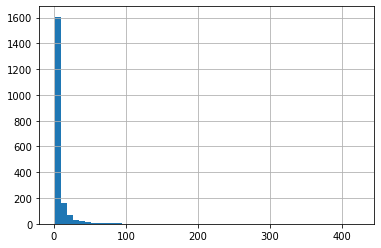

In [126]:
explore_names = subject_frame.named_subject.value_counts()
explore_names.hist(bins=50)

number of names we have:

In [127]:
subject_frame.named_subject.value_counts().count()

1940

how many resources does that correspond to:

In [128]:
id_identified = subject_frame[subject_frame.named_subject.notna()].id.unique()

# about half of the images belong to known person

In [129]:
subject_frame[subject_frame.named_subject.notna()].id.unique().__len__()

13400

In [130]:
len(set(subject_frame.id.unique())) # nbr unique ids

23550

a lot of them don't tell us the name in the source, but it can be found in the title

In [131]:
len(set(subject_frame.id.unique()).difference(set(id_identified)))

10150

In [132]:
subject_frame[~subject_frame.id.isin(named_subjects)].descriptor.value_counts().head(10)

Portraits du théâtre -- 19e siècle    6130
Portraits de studio -- 19e siècle     2513
Portraits -- 19e siècle               1280
Scènes théâtrales -- 19e siècle        212
Portraits collectifs -- 19e siècle     208
Costumes -- 19e siècle                  79
Lanvin (Maison de couture)              67
Danseuses                               67
Enfants                                 55
Tournée Brasseur                        44
Name: descriptor, dtype: int64

In [133]:
subject_frame[~subject_frame.id.isin(portrait_ids) & ~subject_frame.id.isin(named_subjects)].descriptor.value_counts().head()

Scènes théâtrales -- 19e siècle                     111
Représentations d'objet -- 19e siècle                17
Représentations animalières -- 19e siècle            12
Tableaux vivants et mises en scène -- 19e siècle     10
Tournée Brasseur                                      8
Name: descriptor, dtype: int64

In [134]:
subject_frame[~subject_frame.id.isin(portrait_ids)].head()

,descriptor,id,19e,Portraits,caricature,subject_name,named_subject
98,"Offenbach, Jacques (1819-1880) -- Caricatures ...",https://gallica.bnf.fr/ark:/12148/btv1b53065466g,False,False,True,"[Offenbach, Jacques]","Offenbach, Jacques"
99,Caricatures et dessins humoristiques -- 19e si...,https://gallica.bnf.fr/ark:/12148/btv1b53065466g,True,False,True,[],NaN
186,Clairville (1811-1879) -- Caricatures et dessi...,https://gallica.bnf.fr/ark:/12148/btv1b53066427m,False,False,True,[Clairville],Clairville
187,Caricatures et dessins humoristiques -- 19e si...,https://gallica.bnf.fr/ark:/12148/btv1b53066427m,True,False,True,[],NaN
194,"Crémieux, Adolphe (1796-1880) -- Caricatures e...",https://gallica.bnf.fr/ark:/12148/btv1b53065960p,False,False,True,"[Crémieux, Adolphe]","Crémieux, Adolphe"


In [135]:
df['dc:title'].map(lambda x: len(x) if type(x) == list else 1).value_counts()

1    23518
2       32
Name: dc:title, dtype: int64

In [136]:
df['nbr_title'] = df['dc:title'].map(lambda x: len(x) if type(x) == list else 1)

In [137]:
df[df.nbr_title == 1]['dc:title'].sample(10).tolist()

['[M. Bonvin] : [photographie, tirage de démonstration] / [Atelier Nadar]',
 'Me Juliette Darcourt. Châtelet. "Le chat du diable" : [photographie, tirage de démonstration] / [Atelier Nadar]',
 'M. Desbarolles : [photographie, tirage de démonstration] / [Atelier Nadar]',
 'Me Rivolta : [photographie, tirage de démonstration] / [Atelier Nadar]',
 'Dieudonné : [photographie, tirage de démonstration] / [Atelier Nadar]',
 'Jean-Paul, Bouffes Parisiens : [photographie, tirage de démonstration] / [Atelier Nadar]',
 '[Dharville. Renaissance] : [photographie, tirage de démonstration] / [Atelier Nadar]',
 'Me Eames : [photographie, tirage de démonstration] / [Atelier Nadar]',
 '[Portrait de Clary] : [photographie, tirage de démonstration] / [Atelier Nadar]',
 'Laura Schirmer : [photographie, tirage de démonstration] / [Atelier Nadar]']

In [138]:
def find_names_title(name):
    return [x.strip() for x in re.findall('([\S\s ^(\:)]*) \: ', name) if len(x.strip()) > 0]

In [139]:
def extract_from_brackets(name):
    return re.findall('\[([\w \-\,\.]*)\]', name)

In [140]:
def fix_bad_naming(name):
    return re.sub('[\[\]]*', '', name)

In [141]:
text_1 = 'Huguet. Folies-Dramatiques. La petite fronde : [photographie, tirage de démonstration] / [Atelier Nadar]'

In [142]:
text_2 = 'Armand.[lol] Châtelet : [photographie :,'

In [143]:
fix_bad_naming(text_2)

'Armand.lol Châtelet : photographie :,'

In [144]:
extract_from_brackets(text_1)

['photographie, tirage de démonstration', 'Atelier Nadar']

In [145]:
df[df.nbr_title == 1]['dc:title'].map(extract_from_brackets).value_counts().head()

[photographie, tirage de démonstration, Atelier Nadar]                                           14929
[lle, photographie, tirage de démonstration, Atelier Nadar]                                       1008
[me, photographie, tirage de démonstration, Atelier Nadar]                                         110
[Renaissance. En scène, mesdemoiselles, photographie, tirage de démonstration, Atelier Nadar]       51
[i.e. Lantelme, photographie, tirage de démonstration, Atelier Nadar]                               45
Name: dc:title, dtype: int64

In [146]:
df.loc[df.nbr_title == 1, 'first_title'] = df[df.nbr_title == 1]['dc:title'].map(find_names_title)

In [147]:
df.first_title.dropna().map(len).value_counts()

1    23517
0        1
Name: first_title, dtype: int64

In [148]:
df[df.first_title.map(lambda x: len(x)==0 if type(x) ==list else False)]['dc:title'].tolist()

['[Gabrielle Figuet / [Atelier Nadar]']

In [149]:
df.loc[df.first_title.notna(), 'first_title'] = df[
    df.first_title.notna()].first_title.map(
    lambda x: fix_bad_naming(x[0]) if len(x)>0  else x)#.value_counts()

In [150]:
df.count()

dc:creator         23550
dc:date            23550
dc:description       180
dc:relation        23550
dc:source          23550
dc:subject         23550
dc:title           23550
id                 23550
subject_is_list    23550
len_list           14086
nbr_title          23550
first_title        23518
dtype: int64

In [151]:
df = pd.merge(df, subject_frame[['id', 'named_subject']].dropna(), on='id', how='outer')

In [152]:
df.count()

dc:creator         24332
dc:date            24332
dc:description       187
dc:relation        24332
dc:source          24332
dc:subject         24332
dc:title           24332
id                 24332
subject_is_list    24332
len_list           14868
nbr_title          24332
first_title        24300
named_subject      14182
dtype: int64

In [153]:
df.loc[df.first_title.isna() & df['dc:title'].notna(), 'first_title'] = df[    df.first_title.isna( )& df['dc:title'].notna()]['dc:title'].map(lambda x: fix_bad_naming(find_names_title(x[0])[0])).tolist()

In [216]:
df[df.named_subject.isna()]['dc:subject'].value_counts().index.tolist().__len__()

113

In [203]:
df.named_subject.dropna().map(lambda x: 'Charlaviski' in x).value_counts()

False    15901
Name: named_subject, dtype: int64

In [159]:
df[df.first_title.notna() & df.named_subject.isna() & df['dc:subject'].map(lambda x: 'collectifs' in x)].first_title

3                                      Groupe de paysannes
24                     Groupe. Folies-Dramatiques. Juanita
103          Groupe de six acteurs. (Gaîté). "Le Talisman"
616                                   Société Colombophile
637                                              Pyrénéens
2247                      Groupe. En scène, mesdemoiselles
3054                       Rédaction du journal "Le Droit"
3306     Groupe. (Renaissance). "En scène, mesdemoiselles"
4217             Souris. Châtelet groupe d'enfants acteurs
5235     Mlles Barbier, Margueritte, Millia. Nouveau Ci...
6307                                  Congrès astronomique
6861                      Pons de Léon I. e. Ponce de Leon
7724                  Mis Pons de Léon i. e. Ponce de Leon
9090         Groupe. Renaissance. En scène, mesdemoiselles
9107                  Groupe. Renaissance. L'hôtel Godelot
10458       Groupe. (Renaissance). Les 12 femmes de Japhet
10465          Groupe petit Poucet. Gaîté. Le petit Pouc

## now that we have extracted names for most people, get years lived where available (from subject)

In [160]:
def get_years(string):
    x = re.findall('\(([\d{4}  -]+)\)', string)
    if len(x) == 0:
        return None
    return x[0]

def get_years_special(string):
    x = re.findall('\(([\d{4}\d{2}  -\.\?]+)[\S \;]*\)', string)
    if len(x) == 0:
        return None
    return x[0]

In [161]:
subject_frame['years'] = subject_frame.descriptor.map(get_years) 

In [162]:
get_years_special('Febvre, Paul (18..-1928)')

'18..-1928'

41 for which we can't find perfect match

In [163]:
unmatched = subject_frame.years.isna() & subject_frame.descriptor.map(lambda x: '(1' in x)
subject_frame[unmatched].count()

descriptor       3180
id               3180
19e              3180
Portraits        3180
caricature       3180
subject_name     3180
named_subject    3180
years               0
dtype: int64

In [164]:
subject_frame[unmatched].descriptor

12              Decroza, Francine (1868-19..) -- Portraits
23              Decroza, Francine (1868-19..) -- Portraits
26              Decroza, Francine (1868-19..) -- Portraits
34               Dauville, Louise (18..-19..) -- Portraits
44       Nâser ed-Din (1831-1896 ; shah d'Iran) -- Port...
                               ...                        
30152    Montbazon, Marie (18..-19.. ; actrice) -- Port...
30160    Baréty, Henriette (18..-19..? ; actrice) -- Po...
30162    Baréty, Henriette (18..-19..? ; actrice) -- Po...
30164    Baréty, Henriette (18..-19..? ; actrice) -- Po...
8294               Luco, François (18..-1882) -- Portraits
Name: descriptor, Length: 3180, dtype: object

In [165]:
subject_frame.loc[unmatched, 'years'] = subject_frame[unmatched].descriptor.map(get_years_special)

In [166]:
subject_frame[subject_frame.years.notna()].id.unique().__len__()

13053

In [167]:
id_years = subject_frame[subject_frame.years.notna()].id.unique()

In [168]:
df = pd.merge(df, subject_frame[['id', 'years']].dropna(), on='id', how='outer')

we never have more than one named individual ... it seems

In [169]:
(df.groupby(id).named_subject.count() > 1).value_counts()

False    26051
Name: named_subject, dtype: int64

# we can't get year or name of subject, who are we looking at

In [173]:
df[df.named_subject.isna() | df.years.isna()].count()

dc:creator         10497
dc:date            10497
dc:description       140
dc:relation        10497
dc:source          10497
dc:subject         10497
dc:title           10497
id                 10497
subject_is_list    10497
len_list            1041
nbr_title          10497
first_title        10497
named_subject        347
years                  0
dtype: int64

In [187]:
df[
    df.named_subject.isna() |\
    df.years.isna() &\
    df['dc:subject'].map(lambda x: 'Portraits de studio -- 19e siècle' in x) &\
    ~df['dc:subject'].map(lambda x: 'Théâtre' in x)
]['dc:title'].value_counts().sample(10)

Mlle Bucourt : [photographie, tirage de démonstration] / [Atelier Nadar]                                              1
Cuisinier du Shah de Perse : [photographie, tirage de démonstration] / [Atelier Nadar]                                2
Mlle Leloir. Gaîté. Bicyclistes en voyage : [photographie, tirage de démonstration] / [Atelier Nadar]                 1
Mme Rolla : [photographie, tirage de démonstration] / [Atelier Nadar]                                                 1
[Begat. Renaissance. Petite mariée] : [photographie, tirage de démonstration] / [Atelier Nadar]                       2
M[lle] Daume : [photographie, tirage de démonstration] / [Atelier Nadar]                                              1
De Cléry : [photographie, tirage de démonstration] / [Atelier Nadar]                                                  5
Me Bouit. Folies Dramatiques. Les petits mousquetaires : [photographie, tirage de démonstration] / [Atelier Nadar]    2
Ainée [Kruger de Vercy] : [photographie,

In [279]:
matches = df['dc:title'].map(lambda x: re.match('(?!\:)([\s\S]*) :', str(x)))

In [280]:
df[matches.isna()]['dc:title']

24768    [Gabrielle Figuet / [Atelier Nadar]
Name: dc:title, dtype: object

In [286]:
matches.dropna().map(lambda x: re.sub('\[|\]|\:', '', x.group(0))).value_counts().head(100).index.tolist()

['Statuettes Grévin ',
 'Rosa, Josepha ',
 'Groupes Théodora. Sarah Bernhardt et M. Laurent. Porte St Martin ',
 'Groupes Théodora. Porte St-Martin. Sarah Bernhardt et M. Laurent ',
 'Portrait composite des frères Reclus ',
 'Sarah Bernhardt. Porte Saint-Martin. La Tosca ',
 'Groupe Poucet Albert, Duhamel, Christian, Scipion. Gaîté. Petit Poucet ',
 'Ghinassi ',
 "Sarah Bernhardt. Porte Saint-Martin. Jeanne d'Arc ",
 'Chevreul père et fils, Nadar ',
 'Depoix et Larcher. Menus Plaisirs. "Ma femme manque de chic" ',
 'H. Petit et Angelo. Ambigu. "Assommoir" ',
 'Me Debriège ',
 'Mary Anderson. Anglaise ',
 'Sarah et Berton. Porte Saint-Martin. La Tosca ',
 'Febvre et Reichemberg i.e. Reichenberg. Français "L\'Ami Fritz" ',
 'Sarah Bernhardt ',
 'Deval et Max et Sarah Bernhardt. (Renaissance). "Gismonda" ',
 'Granier, Vauthier. Gaîté. Orphée aux enfers ',
 'Marie-Thérèse ',
 'Mme Méaly et M. Fugère. (Gaîté). Le Talisman ',
 'Réjane ',
 'Albert, Duhamel, Christian, Scipion. Gaîté. Petit Po

In [231]:
def find_keywords(x):
    
    if not x:
        return x
    x = str(x)
    l = re.findall('(?!\d)[\w]*', x) # take all words, exclude years
    l = list(set([word for word in l if len(word) > 0])) # drop duplicates in one entry
    return l

In [241]:
tag_list = pd.Series([x for i in df['dc:subject'].map(find_keywords).tolist() for x in i]).value_counts().reset_index()

In [246]:
tag_list_title = pd.Series([x for i in df['dc:title'].map(find_keywords).tolist() for x in i]).value_counts().reset_index()

In [256]:
tag_list_title[tag_list_title['index'].map(lambda x: x.islower() and len(x) > 2)]['index'].head(30).tolist()

['photographie',
 'tirage',
 'démonstration',
 'lle',
 'aux',
 'fils',
 'femme',
 'des',
 'dans',
 'comique',
 'père',
 'dramatiques',
 'voyage',
 'une',
 'non',
 'général',
 'homme',
 'année',
 'scène',
 'mesdemoiselles',
 'peintre',
 'dramatique',
 'femmes',
 'cloches',
 'enfers',
 'lune',
 'rouge',
 'journaliste',
 'frères',
 'petite']

In [252]:
tag_list[tag_list['index'].map(lambda x: x.islower() and len(x) > 2)]['index'].tolist()

['siècle',
 'théâtre',
 'studio',
 'théâtrales',
 'collectifs',
 'actrice',
 'acteur',
 'lyrique',
 'artiste',
 'figures',
 'humaines',
 'siamois',
 'danseuse',
 'couture',
 'roi',
 'cantatrice',
 'dessins',
 'humoristiques',
 'chanteur',
 'japonais',
 'intérieur',
 'empereur',
 'des',
 'duc',
 'acteurs',
 'prince',
 'lieux',
 'familiers',
 'shah',
 'objet',
 'courtisans',
 'personnage',
 'comte',
 'animalières',
 'chanteuse',
 'marquis',
 'fictif',
 'historiques',
 'franco',
 'russe',
 'grand',
 'après',
 'décès',
 'frères',
 'scène',
 'mises',
 'vivants',
 'directeur',
 'militaires',
 'cirque',
 'ténor',
 'lithographe',
 'orientale',
 'dessinateur',
 'homme',
 'architecture',
 'français',
 'domestique',
 'shows',
 'princesse',
 'équestres',
 'ballon',
 'dramatique',
 'baron',
 'portée',
 'jeunesse',
 'artistes',
 'aéronaute',
 'amiral',
 'ebyšev',
 'médecin',
 'van',
 'chef',
 'légendaire',
 'travestis',
 'uruguayens',
 'duchesse',
 'pièces',
 'canine',
 'finances',
 'chinois',
 'vol

### there really is no associated year

In [84]:
subject_frame[~subject_frame.id.isin(id_years) &\
              subject_frame.named_subject.isna() &\
              ~subject_frame.Portraits].descriptor.value_counts().index

Index(['Scènes théâtrales -- 19e siècle', 'Costumes -- 19e siècle',
       'Danseuses', 'Lanvin (Maison de couture)', 'Enfants',
       'Tournée Brasseur', 'Ambassadeurs japonais -- France', 'Trapézistes',
       'Représentations d'objet -- 19e siècle', 'Cour et courtisans -- Iran',
       'Cavalières', 'Clowns', 'Représentations animalières -- 19e siècle',
       'Travestis', 'Violonistes', 'Singes', 'Bicyclettes', 'Nourrissons',
       'Géants', 'Enfants acteurs',
       'Tableaux vivants et mises en scène -- 19e siècle',
       'Ballons -- France -- 19e siècle', 'Vues d'intérieur -- 19e siècle',
       'Mandoline', 'Danse orientale', 'Costumes',
       'Pierrot (personnage fictif)', 'Chat domestique', 'Animaux de cirque',
       'Bicyclettes -- Au théâtre', 'Journaux français', 'Âne',
       'Minstrel shows', 'Géant (ballon)', 'Chien', 'Escrimeurs',
       'Représentations animalières -- 1870-1913', 'Religieux',
       'Haltérophiles', 'Indiens d'Amérique', 'Statues',
       'Hamlet

In [292]:
df[df.first_title.notna() & df.named_subject.notna()][['first_title', 'named_subject']]

,first_title,named_subject
7,Me Auguez,"Auguez, Mathilde"
8,Me Auguez,"Auguez, Mathilde"
9,M. Bruant,"Bruant, Aristide"
10,Me Auguez,"Auguez, Mathilde"
13,M. A. Brasseur,"Brasseur, Albert"
...,...,...
26045,"Desclauzas. ""Rendez-vous bourgeois""","Desclauzas, Marie"
26047,Feighine i.e. Feyghine,Feyghine
26048,Fayolles i.e. Baretta,"Barretta, Blanche"
26049,"Daubray. Bouffes. ""Petite Muette""",Daubray


In [293]:
df[df.first_title.notna() & df.named_subject.notna()].named_subject.value_counts()

Bernhardt, Sarah        496
Réjane                  186
Mily-Meyer, Emilie      171
Théo, Louise            152
Brasseur, Albert        142
                       ... 
Foudras, Théodore de      1
Blanc, Adolphe            1
Despine, Constant         1
Uchard, Mario             1
Duplessis, Paul           1
Name: named_subject, Length: 1940, dtype: int64

In [299]:
df[df.first_title.notna() & df.named_subject.notna()].named_subject.count()

15901

In [298]:
df[df.first_title.notna() & df.named_subject.isna()].first_title.value_counts().head(30).index.tolist()

['Ghinassi',
 'Marie-Thérèse',
 'Ambassade japonaise',
 'Modes Lanvin',
 'Gabrielle',
 'Marie-Thérèse. Variétés',
 "Portrait d'un homme",
 "Portrait d'une femme",
 "Portrait d'une femme non identifiée",
 'Jaeger',
 'Andrée Dalti',
 'Me Cernay',
 'Soukaret. 1er prix de beauté de Spa',
 'Loetitia. Châtelet. "La queue du chat"',
 'Mme Prelly. Folies dramatiques',
 'Mlle Engalli',
 'Modes. Lanvin',
 'Potter i.e. Potters',
 'Me Demoreuil',
 'Laurence',
 'Me Rivolta',
 'Me de Nory',
 'Lhéry',
 'Engally. Opéra comique',
 'Mlle Stuart',
 'Beaumaine. Variétés',
 'Me de Breuil',
 'Paulette',
 'Mlle Gabrielle',
 'Me Féridjée']